In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('topuniversities.csv')

In [3]:
# Check data types and info
print("=== Data Info ===")
print(df.info())

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           300 non-null    int64  
 1   Ordinal Rank                   300 non-null    int64  
 2   University Name                300 non-null    object 
 3   Overall Score                  300 non-null    float64
 4   City                           300 non-null    object 
 5   Country                        300 non-null    object 
 6   Citations per Paper            300 non-null    float64
 7   Papers per Faculty             300 non-null    float64
 8   Academic Reputation            300 non-null    float64
 9   Faculty Student Ratio          300 non-null    float64
 10  Staff with PhD                 294 non-null    float64
 11  International Research Center  300 non-null    float64
 12  International Students         2

In [4]:
print("\n=== Null Values ===")
print(df.isnull().sum())


=== Null Values ===
Rank                              0
Ordinal Rank                      0
University Name                   0
Overall Score                     0
City                              0
Country                           0
Citations per Paper               0
Papers per Faculty                0
Academic Reputation               0
Faculty Student Ratio             0
Staff with PhD                    6
International Research Center     0
International Students            4
Outbound Exchange                 0
Inbound Exchange                  0
International Faculty            17
Employer Reputation               0
dtype: int64


In [20]:
# Drop rows with missing values
df = df.dropna()

In [21]:
# Basic statistics summary
print("\n=== Data Summary ===")
print(df.describe())


=== Data Summary ===
             Rank  Ordinal Rank  Overall Score  Citations per Paper  \
count  282.000000    282.000000     282.000000           282.000000   
mean   145.652482    145.287234      53.022340            44.076241   
std     86.185143     85.996022      19.251825            34.246873   
min      1.000000      1.000000      29.000000             1.000000   
25%     71.250000     71.250000      36.300000            10.125000   
50%    142.500000    142.500000      48.850000            38.150000   
75%    219.750000    219.000000      65.100000            75.950000   
max    300.000000    300.000000     100.000000           100.000000   

       Papers per Faculty  Academic Reputation  Faculty Student Ratio  \
count          282.000000           282.000000             282.000000   
mean            40.898582            53.048227              51.684397   
std             30.147239            26.212242              30.870763   
min              1.200000             8.800000

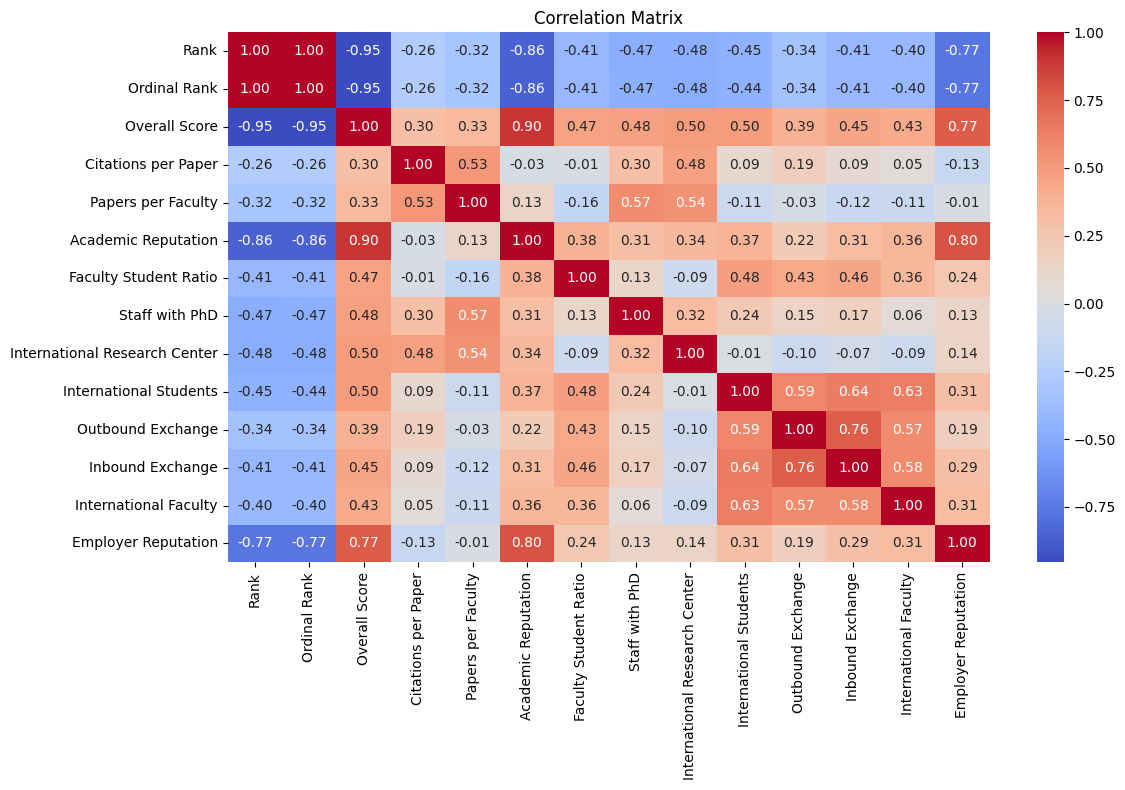

In [22]:
# Calculate correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

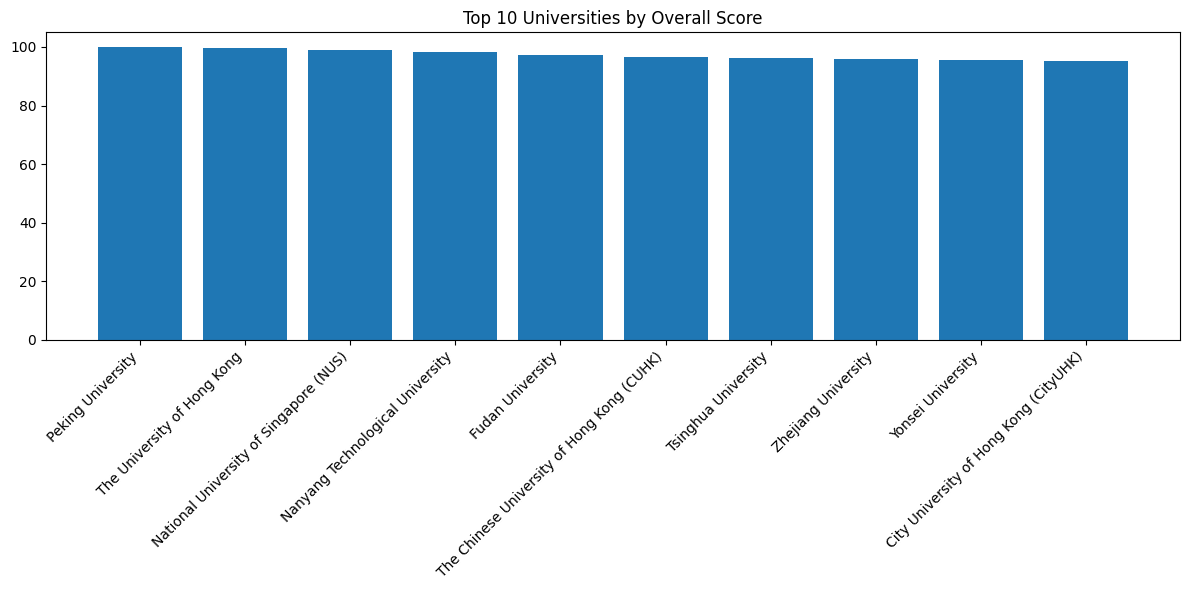

In [23]:
# Bar chart of top 10 universities by overall score
plt.figure(figsize=(12, 6))
top_10 = df.head(10)
plt.bar(top_10['University Name'], top_10['Overall Score'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Universities by Overall Score')
plt.tight_layout()
plt.show()

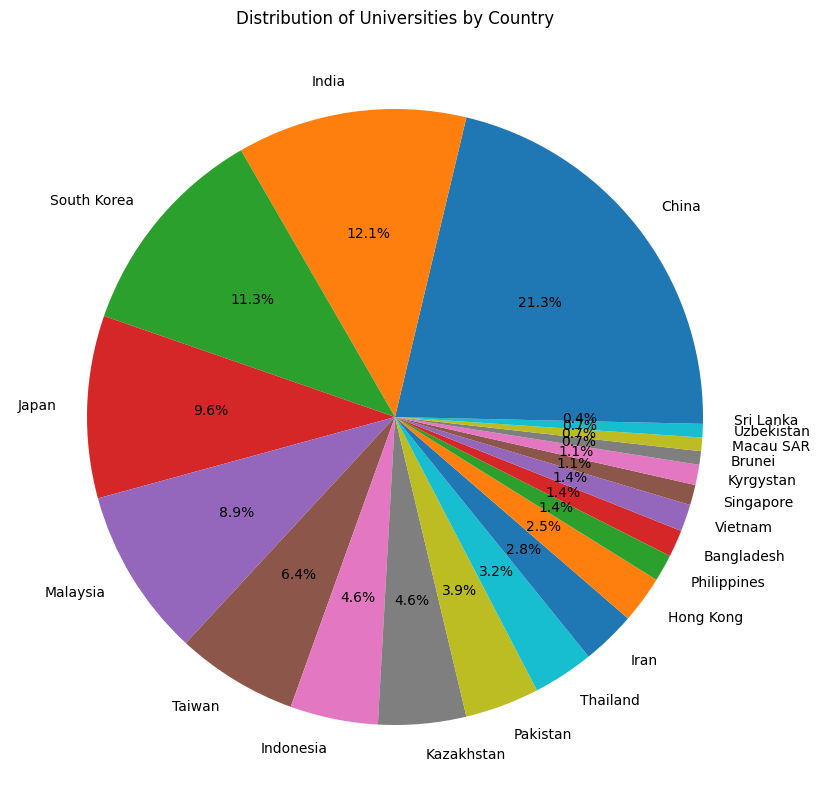

In [24]:
# Pie chart of universities by country
country_counts = df['Country'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Universities by Country')
plt.show()


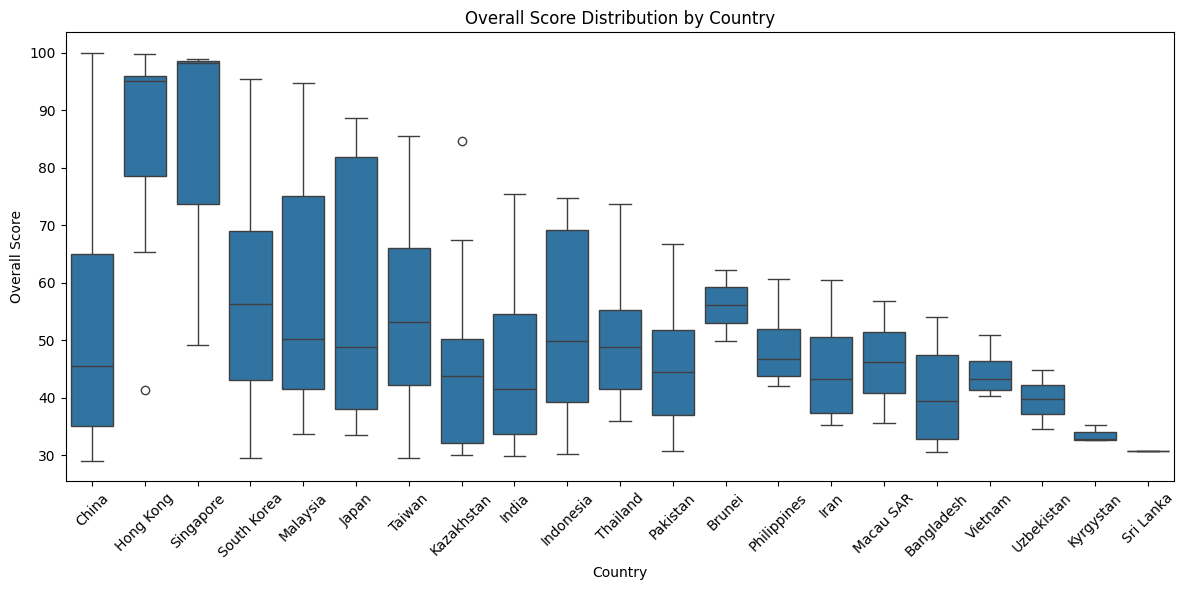

In [25]:
# Box plot of Overall Score by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Overall Score', data=df)
plt.xticks(rotation=45)
plt.title('Overall Score Distribution by Country')
plt.tight_layout()
plt.show()

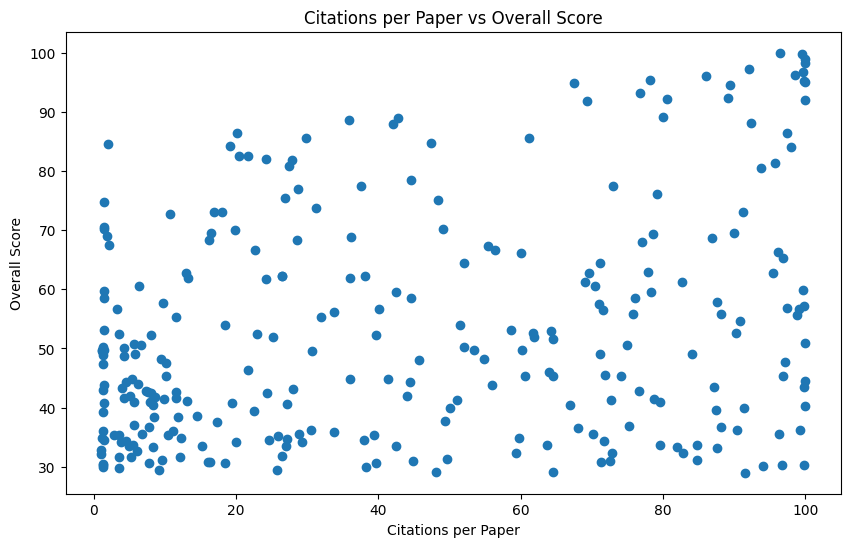

In [26]:
# Scatter plot of Citations per Paper vs Overall Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Citations per Paper'], df['Overall Score'])
plt.xlabel('Citations per Paper')
plt.ylabel('Overall Score')
plt.title('Citations per Paper vs Overall Score')
plt.show()

In [27]:
# Select features based on our goals (identifying key factors affecting university rankings)
selected_features = [
    'Citations per Paper',
    'Papers per Faculty',
    'Academic Reputation',
    'Faculty Student Ratio',
    'Staff with PhD',
    'International Research Center',
    'International Students',
    'International Faculty',
    'Employer Reputation'
]

In [28]:
# Prepare features and target
X = df[selected_features]

In [29]:
# Create ranking groups (Top, Middle, Lower tier universities)
y = pd.qcut(df['Overall Score'], q=3, labels=['Top', 'Middle', 'Lower'])


In [30]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [33]:
# Initialize and train QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [34]:
# Make predictions
y_pred = qda_model.predict(X_test)

In [46]:
# Model Evaluation
print("=== Model Performance Analysis ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Model Performance Analysis ===

Classification Report:
              precision    recall  f1-score   support

       Lower       0.94      0.80      0.86        20
      Middle       0.76      0.93      0.84        14
         Top       1.00      1.00      1.00        23

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.90        57
weighted avg       0.92      0.91      0.91        57



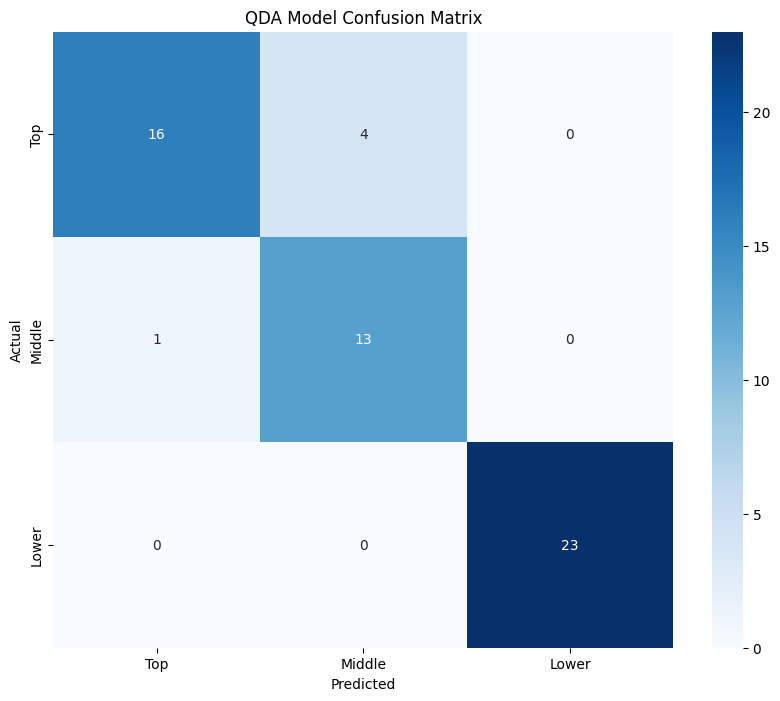

In [36]:
# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Top', 'Middle', 'Lower'],
            yticklabels=['Top', 'Middle', 'Lower'])
plt.title('QDA Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
# Cross-validation scores
cv_scores = cross_val_score(qda_model, X_scaled, y, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")



Cross-validation scores: [0.50877193 0.94736842 0.96428571 0.92857143 0.66071429]
Average CV score: 0.802 (+/- 0.368)


In [39]:
# Feature importance analysis
class_means = []
for class_label in np.unique(y):
    class_data = X[y == class_label]
    class_means.append(class_data.mean())

class_means_df = pd.DataFrame(class_means,
                            columns=selected_features,
                            index=['Top', 'Middle', 'Lower'])


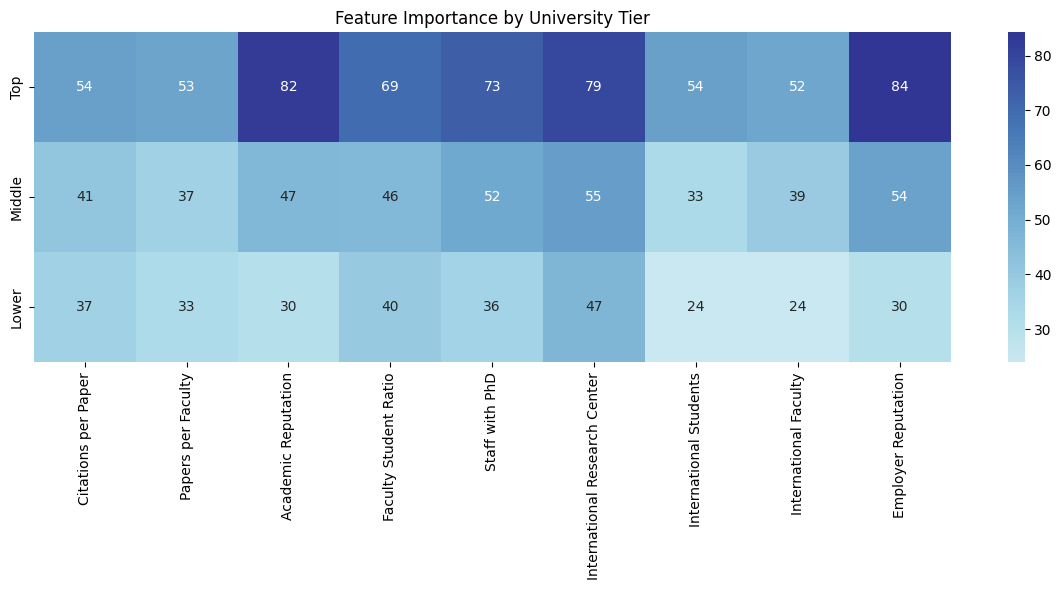

In [40]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.heatmap(class_means_df, annot=True, cmap='RdYlBu', center=0)
plt.title('Feature Importance by University Tier')
plt.tight_layout()
plt.show()

In [41]:
# Save the model and scaler
model_path = 'university_qda_model.joblib'
scaler_path = 'university_scaler.joblib'
joblib.dump(qda_model, model_path)
joblib.dump(scaler, scaler_path)

['university_scaler.joblib']

In [42]:
# Function to make predictions for new universities
def predict_university_tier(features_dict):
    """
    Predict university tier based on input features.

    Parameters:
    features_dict (dict): Dictionary containing university features

    Returns:
    str: Predicted university tier
    """
    # Convert input to correct format
    features = [features_dict[feature] for feature in selected_features]
    features_array = np.array(features).reshape(1, -1)

    # Scale features
    scaled_features = scaler.transform(features_array)

    # Make prediction
    prediction = qda_model.predict(scaled_features)

    return prediction[0]


In [43]:
# Example usage
print("\n=== Example Prediction ===")
example_university = {
    'Citations per Paper': 90.0,
    'Papers per Faculty': 85.0,
    'Academic Reputation': 95.0,
    'Faculty Student Ratio': 88.0,
    'Staff with PhD': 92.0,
    'International Research Center': 89.0,
    'International Students': 80.0,
    'International Faculty': 85.0,
    'Employer Reputation': 93.0
}

predicted_tier = predict_university_tier(example_university)
print(f"Predicted University Tier: {predicted_tier}")



=== Example Prediction ===
Predicted University Tier: Lower


In [44]:
# Save model information
model_info = {
    'features': selected_features,
    'model_path': model_path,
    'scaler_path': scaler_path,
    'performance': {
        'cv_scores_mean': cv_scores.mean(),
        'cv_scores_std': cv_scores.std()
    }
}


In [45]:
# Save model information to JSON
with open('model_info.json', 'w') as f:
    json.dump(model_info, f, indent=4)

print("\n=== Model Saved ===")
print(f"Model saved as: {model_path}")
print(f"Scaler saved as: {scaler_path}")
print("Model information saved as: model_info.json")


=== Model Saved ===
Model saved as: university_qda_model.joblib
Scaler saved as: university_scaler.joblib
Model information saved as: model_info.json
